# Twitter US Airline Sentiment - Part I: Exploratory Data Analysis
## Xin (Andrew) Wei, PhD Candidate
### March 21, 2019
-  This project analyzes how travelers in February 2015 expressed their feelings about their flights on Twitter. Data are publicly available at [Kaggle.com](https://www.kaggle.com/crowdflower/twitter-airline-sentiment#Tweets.csv)
-  Part I will implement exploratory data analysis to get familiar with the dataset
-  Main tools used: Python 3, Pandas, Matplotlib, Seaborn, WordCloud

## Importing Dataset

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sns

In [33]:
df = pd.read_csv("./Tweets.csv") # data file should be in the same directory as this notebook file

In [200]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [201]:
df.shape

(14640, 15)

## Tweets per Sentiment

In [34]:
## Group and count tweets by sentiment
grouped_sentiment = df.groupby('airline_sentiment').size().reset_index(name='counts').set_index('airline_sentiment')
grouped_sentiment

,counts
airline_sentiment,
negative,9178
neutral,3099
positive,2363


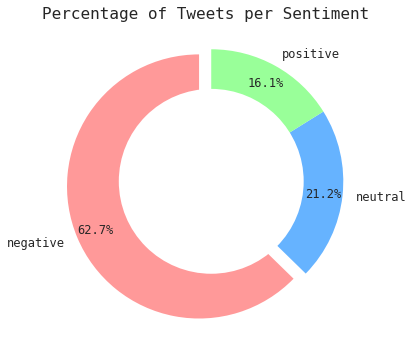

In [43]:
## Donut chart: percentage of tweets per sentiment
# draw pie chart
rcParams['font.family'] = 'monospace'
fig1, ax1 = plt.subplots(figsize=(4.5,4.5))
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)
ax1.pie(grouped_sentiment.counts, labels = grouped_sentiment.index, colors = colors, explode = explode, 
        autopct='%1.1f%%', pctdistance=0.85, startangle = 90, textprops={'fontsize': 12})
fig1.suptitle('Percentage of Tweets per Sentiment', fontsize = 16, y=1.05)

# draw circle
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax1.axis('equal')
plt.tight_layout()
plt.show()

From the donut chart, we see that negative sentiment tweets comprise 62.7% among all 14640 tweets.

## Tweets per Airline

In [36]:
## Group and count tweets by both airline and sentiment
grouped = df.groupby(['airline_sentiment', 'airline']).size().reset_index(name='counts')
grouped = pd.merge(left = grouped, right = grouped.groupby('airline').counts.sum().reset_index(name = 'total'), 
                   how = 'left', on = 'airline')
grouped['percent'] = grouped['counts'] / grouped['total']
# 'percent' shows the percentage of tweets with certain sentiment among all tweets directed towards this airline.
# For instance, row 0 shows that among all tweets about American airline, 71% have negative sentiment.
grouped.drop(columns='total', axis=1)

,airline_sentiment,airline,counts,percent
0,negative,American,1960,0.710402
1,negative,Delta,955,0.429793
2,negative,Southwest,1186,0.490083
3,negative,US Airways,2263,0.776862
4,negative,United,2633,0.688906
5,negative,Virgin America,181,0.359127
6,neutral,American,463,0.167814
7,neutral,Delta,723,0.325383
8,neutral,Southwest,664,0.274380
9,neutral,US Airways,381,0.130793


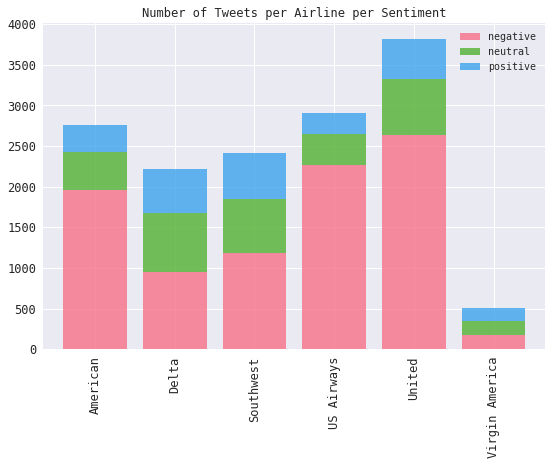

In [61]:
## Stacked bar chart: number of tweets per airline per sentiment
df_counts = pd.DataFrame({
    'negative' : grouped['counts'][grouped['airline_sentiment'] ==  'negative'].values,
    'neutral' : grouped['counts'][grouped['airline_sentiment'] ==  'neutral'].values,
    'positive' : grouped['counts'][grouped['airline_sentiment'] ==  'positive'].values},
    index = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America'])

sns.set(font = 'monospace')
fig2 = df_counts.plot.bar(figsize = (9, 6), stacked=True, width = 0.8, alpha = 0.8, fontsize = 12,
                          colormap = ListedColormap(sns.color_palette('husl',3)),
                          title='Number of Tweets per Airline per Sentiment')
plt.show()

From the above figure, we see that tweets are mostly directed towards United, US Airways, American, followed by Southwest, Delta. On the contrary, Virgin America only has 500 among 14640 tweets, about 3%.

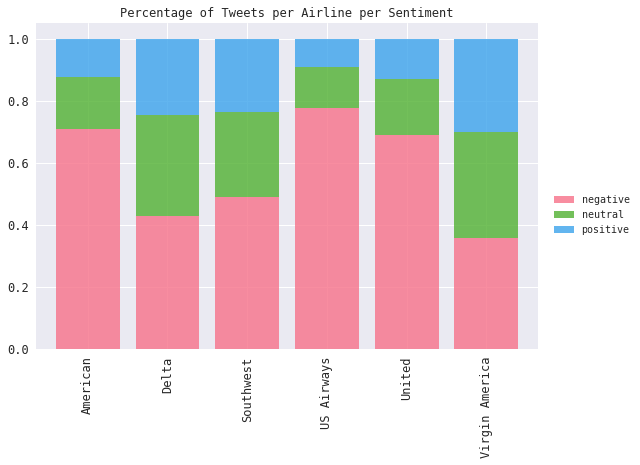

In [67]:
## Stacked bar chart: percentage of tweets per airline per sentiment
df_counts = pd.DataFrame({
    'negative' : grouped['percent'][grouped['airline_sentiment'] ==  'negative'].values,
    'neutral' : grouped['percent'][grouped['airline_sentiment'] ==  'neutral'].values,
    'positive' : grouped['percent'][grouped['airline_sentiment'] ==  'positive'].values},
    index = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America'])

sns.set(font = 'monospace')
fig3 = df_counts.plot.bar(figsize = (9, 6), stacked=True, width = 0.8, alpha = 0.8, fontsize = 12,
                          colormap = ListedColormap(sns.color_palette('husl',3)),
                          title='Percentage of Tweets per Airline per Sentiment').legend(bbox_to_anchor=(1.2, 0.5))
plt.show()

The above figure shows the proportion of negative sentiment tweets per airline. We see that US Airways, American and United directed tweets are mostly negative. On the contrary, tweets directed towards Virgin America, Delta, and Southwest contain a good proportion of neutral and positive sentiment tweets.

## Reasons for Negative Sentiment

In [29]:
## Frequency table of all reasons for negative sentiment
reasons = df['negativereason'].value_counts()
reasons

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

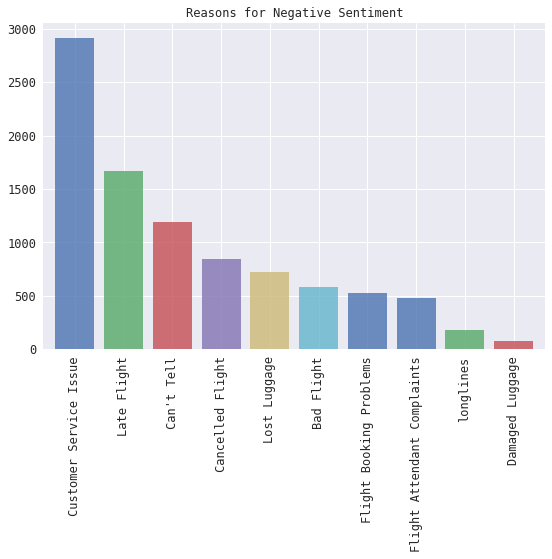

In [71]:
## Bar chart: reasons for negative sentiment
sns.set(font = 'monospace')
fig4 = reasons.plot.bar(figsize = (9, 6), width = 0.8, alpha = 0.8, fontsize = 12,
                        title='Reasons for Negative Sentiment')
plt.show()

We see that most negative sentiments are caused by Customer Service issue, followed by Late Flight.

## Reasons for Negative Sentiment per Airline

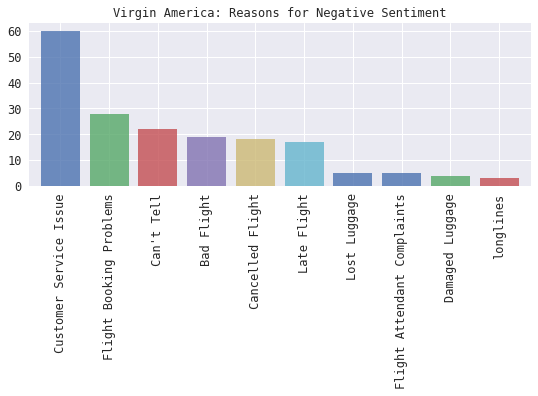

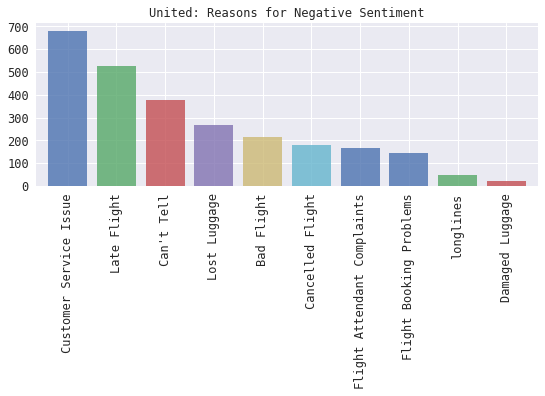

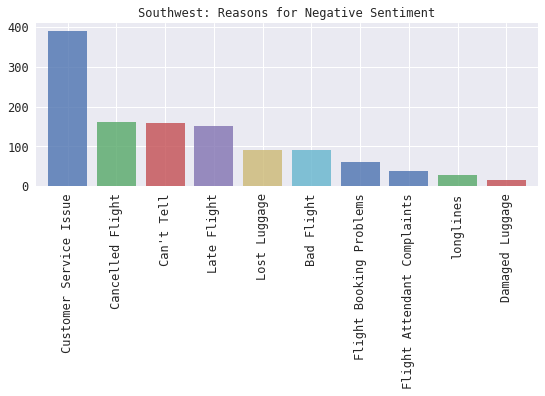

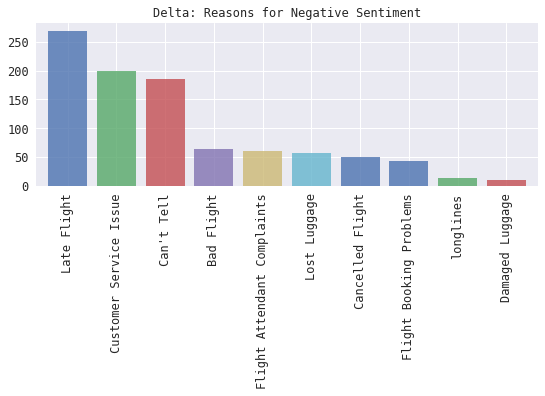

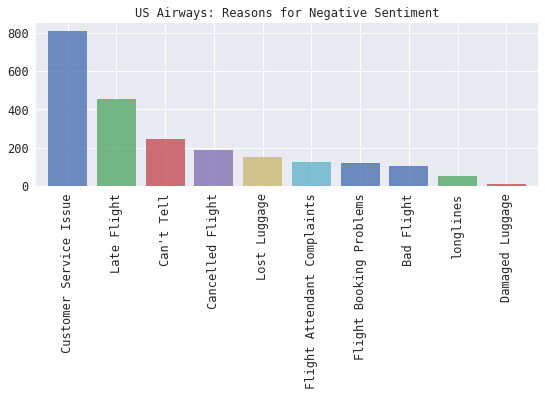

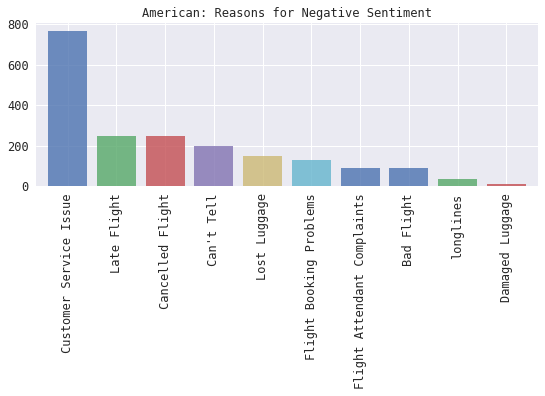

In [72]:
## Bar charts: reasons for negative sentiment per airline
airline = df['airline'].unique()
for i in airline:
    reason = df.loc[df['airline'] == i, 'negativereason'].value_counts()
    sns.set(font = 'monospace')
    fig = reason.plot.bar(figsize = (9, 3), width = 0.8, alpha = 0.8, fontsize = 12, 
                          title=i + ': Reasons for Negative Sentiment')
    plt.show()

1. We see that United, US Airways, American all have negative reason mostly of Customer Service Issue followed by Late Flight.
2. Virgin America has a bad flight booking system, as their second reason for negative sentiment is Flight Booking Problems.
3. Southwest frequently cancel flights, as their second reason for negative sentiment is Cancelled Flight.
4. Delta does badly make their flights depart on time, as their most significant reason for negative sentiment is Late Flight.

## Sentiment Confidence & Retweets Analysis

In [210]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


From the table, we see that:
1. Contributors are pretty confident (with high mean 0.9 and low std. 0.16) to specify tweets sentiment
2. On the contrary, they are less sure (with low mean 0.64 and high std. 0.33) to categorize negative reasons 

In [211]:
df['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

We see that most tweets have 0 retweets. A small portion has less than 5 retweets. There are three tweets have >30 retweets (44, 32, 31 respectively).

## Word Cloud for Negative Tweets

In [212]:
from wordcloud import WordCloud, STOPWORDS

In [213]:
df_neg = df[df['airline_sentiment'] == 'negative']
words = ' '.join(df_neg['text'])
cleaned_words = ' '.join([word for word in words.split()
                         if 'http' not in word
                             and not word.startswith('@')
                         ])

In [214]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = 'black',
                     width = 3000,
                     height = 2500).generate(cleaned_words)

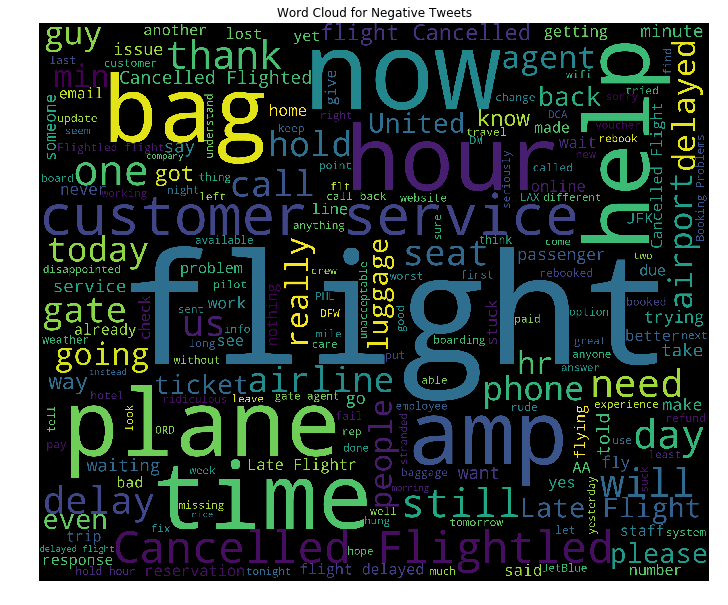

In [215]:
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

We can see that tweets with negative sentiment frequently contains words like time, hour, bag, cancelled, customer, service, etc. We may guess that passengers tend to complain about delayed flights, luggage issues, cancelled flights, and customer services. The major information here were collected into the column of 'negativereason' by contributors, as we have already analyzed above. But, the word cloud graph provides added values when one looks at words of smaller size. 

## Conclusions & Future Work
Based on the above exploratory data analysis, I get familiar with the dataset and found that:
-  Most tweets have negative sentiment (63%)
-  Most tweets are about United, followed by US Airways and American
-  Virgin America receives very few tweets (3%)
-  Most tweets are targeted towards US Airways, American, and United contain negative sentiment
-  Main reasons for negative sentiment are Customer Service Issue and Late Flight
-  Virgin America has a bad flight booking system
-  Southwest frequently cancel flights
-  Delta does badly make their flights depart on time
-  Contributors are confident to specify tweets sentiment, while less sure to categorize reasons of negative sentiment
-  Most tweets have 0 retweets. The maximum retweet is 44

Future work:
-  Use Seaborn or ggplot library to create more beautiful charts